In [1]:
import numpy as np


class LossAndDerivatives:
    @staticmethod
    def mse(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)
        Return : float
            single number with MSE value of linear model (X.dot(w)) with no bias term
            on the selected dataset.

        Comment: If Y is two-dimentional, average the error over both dimentions.
        """

        return np.mean((X.dot(w) - Y) ** 2)

    @staticmethod
    def mae(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)

        Return: float
            single number with MAE value of linear model (X.dot(w)) with no bias term
            on the selected dataset.
        Comment: If Y is two-dimentional, average the error over both dimentions.
        """

        # YOUR CODE HERE
        return np.mean(np.abs(X.dot(w) - Y))

    @staticmethod
    def l2_reg(w):
        """
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)
        Return: float
            single number with sum of squared elements of the weight matrix ( \sum_{ij} w_{ij}^2 )
        Computes the L2 regularization term for the weight matrix w.
        """

        # YOUR CODE HERE
        return np.sum(w ** 2)

    @staticmethod
    def l1_reg(w):
        """
        w : numpy array of shape (`n_features`, `target_dimentionality`)
        Return : float
            single number with sum of the absolute values of the weight matrix ( \sum_{ij} |w_{ij}| )

        Computes the L1 regularization term for the weight matrix w.
        """

        # YOUR CODE HERE
        return np.sum(np.abs(w))

    @staticmethod
    def no_reg(w):
        """
        Simply ignores the regularization
        """
        return 0.

    @staticmethod
    def mse_derivative(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)

        Return : numpy array of same shape as `w`
        Computes the MSE derivative for linear regression (X.dot(w)) with no bias term
        w.r.t. w weight matrix.

        Please mention, that in case `target_dimentionality` > 1 the error is averaged along this
        dimension as well, so you need to consider that fact in derivative implementation.
        """

        # YOUR CODE HERE
        return 2 * X.T.dot((X.dot(w) - Y)) / np.prod(Y.shape)

    @staticmethod
    def mae_derivative(X, Y, w):
        """
        X : numpy array of shape (`n_observations`, `n_features`)
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)

        Return : numpy array of same shape as `w`
        Computes the MAE derivative for linear regression (X.dot(w)) with no bias term
        w.r.t. w weight matrix.

        Please mention, that in case `target_dimentionality` > 1 the error is averaged along this
        dimension as well, so you need to consider that fact in derivative implementation.
        """

        # YOUR CODE HERE
        return -X.T.dot(np.sign(Y - X.dot(w))) / np.prod(Y.shape)

    @staticmethod
    def l2_reg_derivative(w):
        """
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)
        Return : numpy array of same shape as `w`
        Computes the L2 regularization term derivative w.r.t. the weight matrix w.
        """

        # YOUR CODE HERE
        return 2 * w

    @staticmethod
    def l1_reg_derivative(w):
        """
        Y : numpy array of shape (`n_observations`, `target_dimentionality`) or (`n_observations`,)
        w : numpy array of shape (`n_features`, `target_dimentionality`) or (`n_features`,)
        Return : numpy array of same shape as `w`
        Computes the L1 regularization term derivative w.r.t. the weight matrix w.
        """

        # YOUR CODE HERE
        return np.sign(w)

    @staticmethod
    def no_reg_derivative(w):
        """
        Simply ignores the derivative
        """
        return np.zeros_like(w)


In [2]:
'''
If you are using Google Colab, uncomment the next lines to download `loss_and_derivatives.py` and `boston_subset.json`
You can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.
'''
!wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/assignment0_02_lin_reg/loss_and_derivatives.py
!wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/assignment0_02_lin_reg/boston_subset.json

--2021-10-18 17:53:24--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/assignment0_02_lin_reg/loss_and_derivatives.py
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 4600 (4,5K) [text/plain]
Сохранение в: «loss_and_derivatives.py»

loss_and_derivative 100%[===================>]   4,49K  --.-KB/s    за 0s      

2021-10-18 17:53:24 (11,7 MB/s) - «loss_and_derivatives.py» сохранён [4600/4600]

--2021-10-18 17:53:25--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/assignment0_02_lin_reg/boston_subset.json
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Подключение к raw.githubusercontent.com (raw.githubuserconte

In [3]:
# Run some setup code for this notebook.
import random
import numpy as np
import matplotlib.pyplot as plt

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import json
with open('boston_subset.json', 'r') as iofile:
    dataset = json.load(iofile)
feature_matrix = np.array(dataset['data'])
targets = np.array(dataset['target'])


In [3]:
w = np.array([1., 1.])
x_n, y_n = feature_matrix, targets

# Repeating data to make everything multi-dimentional
w = np.vstack([w[None, :] + 0.27, w[None, :] + 0.22, w[None, :] + 0.45, w[None, :] + 0.1]).T
y_n = np.hstack([y_n[:, None], 2*y_n[:, None], 3*y_n[:, None], 4*y_n[:, None]])


In [4]:
reference_mse_derivative = np.array([
    [ 7.32890068, 12.88731311, 18.82128365, 23.97731238],
    [ 9.55674399, 17.05397661, 24.98807528, 32.01723714]
])
reference_l2_reg_derivative = np.array([
    [2.54, 2.44, 2.9 , 2.2 ],
    [2.54, 2.44, 2.9 , 2.2 ]
])

assert np.allclose(
    reference_mse_derivative,
    LossAndDerivatives.mse_derivative(x_n, y_n, w), rtol=1e-3
    ), 'Something wrong with MSE derivative'

assert np.allclose(
    reference_l2_reg_derivative,
    LossAndDerivatives.l2_reg_derivative(w), rtol=1e-3
), 'Something wrong with L2 reg derivative'

print(
    'MSE derivative:\n{} \n\nL2 reg derivative:\n{}'.format(
        LossAndDerivatives.mse_derivative(x_n, y_n, w),
        LossAndDerivatives.l2_reg_derivative(w))
)

MSE derivative:
[[ 7.32890068 12.88731311 18.82128365 23.97731238]
 [ 9.55674399 17.05397661 24.98807528 32.01723714]] 

L2 reg derivative:
[[2.54 2.44 2.9  2.2 ]
 [2.54 2.44 2.9  2.2 ]]


In [5]:
reference_mae_derivative = np.array([
    [0.19708867, 0.19621798, 0.19621798, 0.19572906],
    [0.25574138, 0.25524507, 0.25524507, 0.25406404]
])
reference_l1_reg_derivative = np.array([
    [1., 1., 1., 1.],
    [1., 1., 1., 1.]
])

assert np.allclose(
    reference_mae_derivative,
    LossAndDerivatives.mae_derivative(x_n, y_n, w), rtol=1e-3
), 'Something wrong with MAE derivative'

assert np.allclose(
    reference_l1_reg_derivative,
    LossAndDerivatives.l1_reg_derivative(w), rtol=1e-3
), 'Something wrong with L1 reg derivative'

print(
    'MAE derivative:\n{} \n\nL1 reg derivative:\n{}'.format(
        LossAndDerivatives.mae_derivative(x_n, y_n, w),
        LossAndDerivatives.l1_reg_derivative(w))
)

MAE derivative:
[[0.19708867 0.19621798 0.19621798 0.19572906]
 [0.25574138 0.25524507 0.25524507 0.25406404]] 

L1 reg derivative:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [6]:
def get_w_by_grad(X, Y, w_0, loss_mode='mse', reg_mode=None, lr=0.05, n_steps=100, reg_coeff=0.05):
    if loss_mode == 'mse':
        loss_function = LossAndDerivatives.mse
        loss_derivative = LossAndDerivatives.mse_derivative
    elif loss_mode == 'mae':
        loss_function = LossAndDerivatives.mae
        loss_derivative = LossAndDerivatives.mae_derivative
    else:
        raise ValueError('Unknown loss function. Available loss functions: `mse`, `mae`')

    if reg_mode is None:
        reg_function = LossAndDerivatives.no_reg
        reg_derivative = LossAndDerivatives.no_reg_derivative # lambda w: np.zeros_like(w)
    elif reg_mode == 'l2':
        reg_function = LossAndDerivatives.l2_reg
        reg_derivative = LossAndDerivatives.l2_reg_derivative
    elif reg_mode == 'l1':
        reg_function = LossAndDerivatives.l1_reg
        reg_derivative = LossAndDerivatives.l1_reg_derivative
    else:
        raise ValueError('Unknown regularization mode. Available modes: `l1`, `l2`, None')
    
    
    w = w_0.copy()

    for i in range(n_steps):
        empirical_risk = loss_function(X, Y, w) + reg_coeff * reg_function(w)
        gradient = loss_derivative(X, Y, w) + reg_coeff * reg_derivative(w)
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm > 5.:
            gradient = gradient / gradient_norm * 5.
        w -= lr * gradient
        
        if i % 25 == 0:
            print('Step={}, loss={},\ngradient values={}\n'.format(i, empirical_risk, gradient))
    return w


In [7]:
w = np.ones((2,1), dtype=float)
y_n = targets[:, None] 

In [8]:
w_grad = get_w_by_grad(x_n, y_n, w, loss_mode='mae', reg_mode='l1', n_steps=250)

Step=0, loss=13.643791083575469,
gradient values=[[0.83487192]
 [1.0709803 ]]

Step=25, loss=11.421418469934704,
gradient values=[[0.72543842]
 [0.95358128]]

Step=50, loss=9.66813370222951,
gradient values=[[0.71129557]
 [0.93187192]]

Step=75, loss=8.029491928578741,
gradient values=[[0.67838424]
 [0.88369951]]

Step=100, loss=6.623783462141103,
gradient values=[[0.55164039]
 [0.7793202 ]]

Step=125, loss=5.868884546482321,
gradient values=[[0.30341872]
 [0.50934483]]

Step=150, loss=5.559182308009448,
gradient values=[[0.15555172]
 [0.35090148]]

Step=175, loss=5.447431088052493,
gradient values=[[0.03915271]
 [0.24241379]]

Step=200, loss=5.385930541326718,
gradient values=[[0.00266502]
 [0.19318719]]

Step=225, loss=5.349017906184082,
gradient values=[[-0.05280788]
 [ 0.12846798]]



In [9]:
w_grad= get_w_by_grad(x_n, y_n, w, loss_mode='mse', reg_mode='l2', n_steps=250)

Step=0, loss=231.28353984777308,
gradient values=[[3.03360308]
 [3.97457575]]

Step=25, loss=58.512903511682715,
gradient values=[[2.28551977]
 [4.44706638]]

Step=50, loss=48.29584498872882,
gradient values=[[-0.89558132]
 [ 0.76425616]]

Step=75, loss=47.292783042717005,
gradient values=[[-0.48111511]
 [ 0.40907079]]

Step=100, loss=47.00419092029711,
gradient values=[[-0.25806412]
 [ 0.21942022]]

Step=125, loss=46.921159712801064,
gradient values=[[-0.1384223 ]
 [ 0.11769421]]

Step=150, loss=46.897270698227686,
gradient values=[[-0.07424796]
 [ 0.06312967]]

Step=175, loss=46.890397559386315,
gradient values=[[-0.03982566]
 [ 0.03386195]]

Step=200, loss=46.88842007984702,
gradient values=[[-0.02136197]
 [ 0.01816312]]

Step=225, loss=46.88785113668749,
gradient values=[[-0.01145829]
 [ 0.00974247]]



In [10]:
from sklearn.linear_model import Ridge

In [11]:
lr = Ridge(alpha=0.05)
print(lr)
lr.fit(x_n, y_n)
print('sklearn linear regression implementation delivers MSE = {}'.format(np.mean((lr.predict(x_n) - y_n)**2)))

Ridge(alpha=0.05)
sklearn linear regression implementation delivers MSE = 42.53541245128315


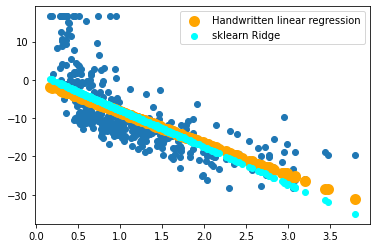

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x_n[:, -1], y_n[:, -1])
plt.scatter(x_n[:, -1], x_n.dot(w_grad)[:, -1], color='orange', label='Handwritten linear regression', linewidth=5)
plt.scatter(x_n[:, -1], lr.predict(x_n), color='cyan', label='sklearn Ridge')
plt.legend()
plt.show()

In [14]:
np.ones_like(w)

array([[1.],
       [1.]])